In [1]:
import sys 
# sys.path.append('/Users/vrli/Desktop/llms-vis')
# sys.path.append('/Users/johnathansun/Documents/public/')
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from ast import literal_eval
from constants import *
from get_dataframes import *

plt.rcParams['figure.dpi'] = 300

In [2]:
def get_successes_barplot(plot_df, x_col, y_col):
    plot_df['condition'] = plot_df['condition'].map(condition_rename_map)
    plot_df['model'] = plot_df['model'].map(model_rename_map)
    
    # 2 row, 1 column plot
    _, axes = plt.subplots(2, 1, figsize=(11, 6), sharex=True)

    # define order and x-label mappings
    order_map = {
        "num_clusters": [2, 3, 4, 5],
        "extra_points": [9, 7, 5, 3],
        "z_score": [">3", "(2,3]", "(1,2]", "≤1"]
    }
    
    xlabel_map = {
        "num_clusters": "Number of Clusters",
        "extra_points": "Number of Points Beyond Vertex", 
        "z_score": "Vertical Z-Score"
    }
    
    if x_col not in order_map:
        raise ValueError(f"Unsupported x_col: {x_col}")
    
    order = order_map[x_col]
    models = ['GPT 4.1', 'Claude 3.5']
    
    for i, model in enumerate(models):
        sns.barplot(
            x=x_col, y=y_col,
            data=plot_df[plot_df['model'] == model],
            hue='condition', 
            palette=HEX, 
            ax=axes[i],
            order=order
        )
        
        axes[i].set_title(model, fontsize=font_size, loc='left')
        axes[i].set_ylabel('Success Count', fontsize=label_size)
        axes[i].set_ylim(0, 100)
        axes[i].set_yticks([0, 50, 100])
        axes[i].tick_params(axis='both', which='both', labelsize=label_size)
        
        if i == 0:  # Top plot: GPT 4.1
            axes[i].set_xlabel('')  # shared x-label
            leg = axes[i].legend(loc='upper left', bbox_to_anchor=(1, 0.95), title='Condition', fontsize=legend_size)
            leg.get_title().set_fontsize(font_size)
        else:  # Bottom plot: Claude 3.5
            axes[i].set_xlabel(xlabel_map[x_col], fontsize=font_size)
            axes[i].legend_.remove()

    plt.subplots_adjust(hspace=-1.6)
    plt.tight_layout()
    plt.show()

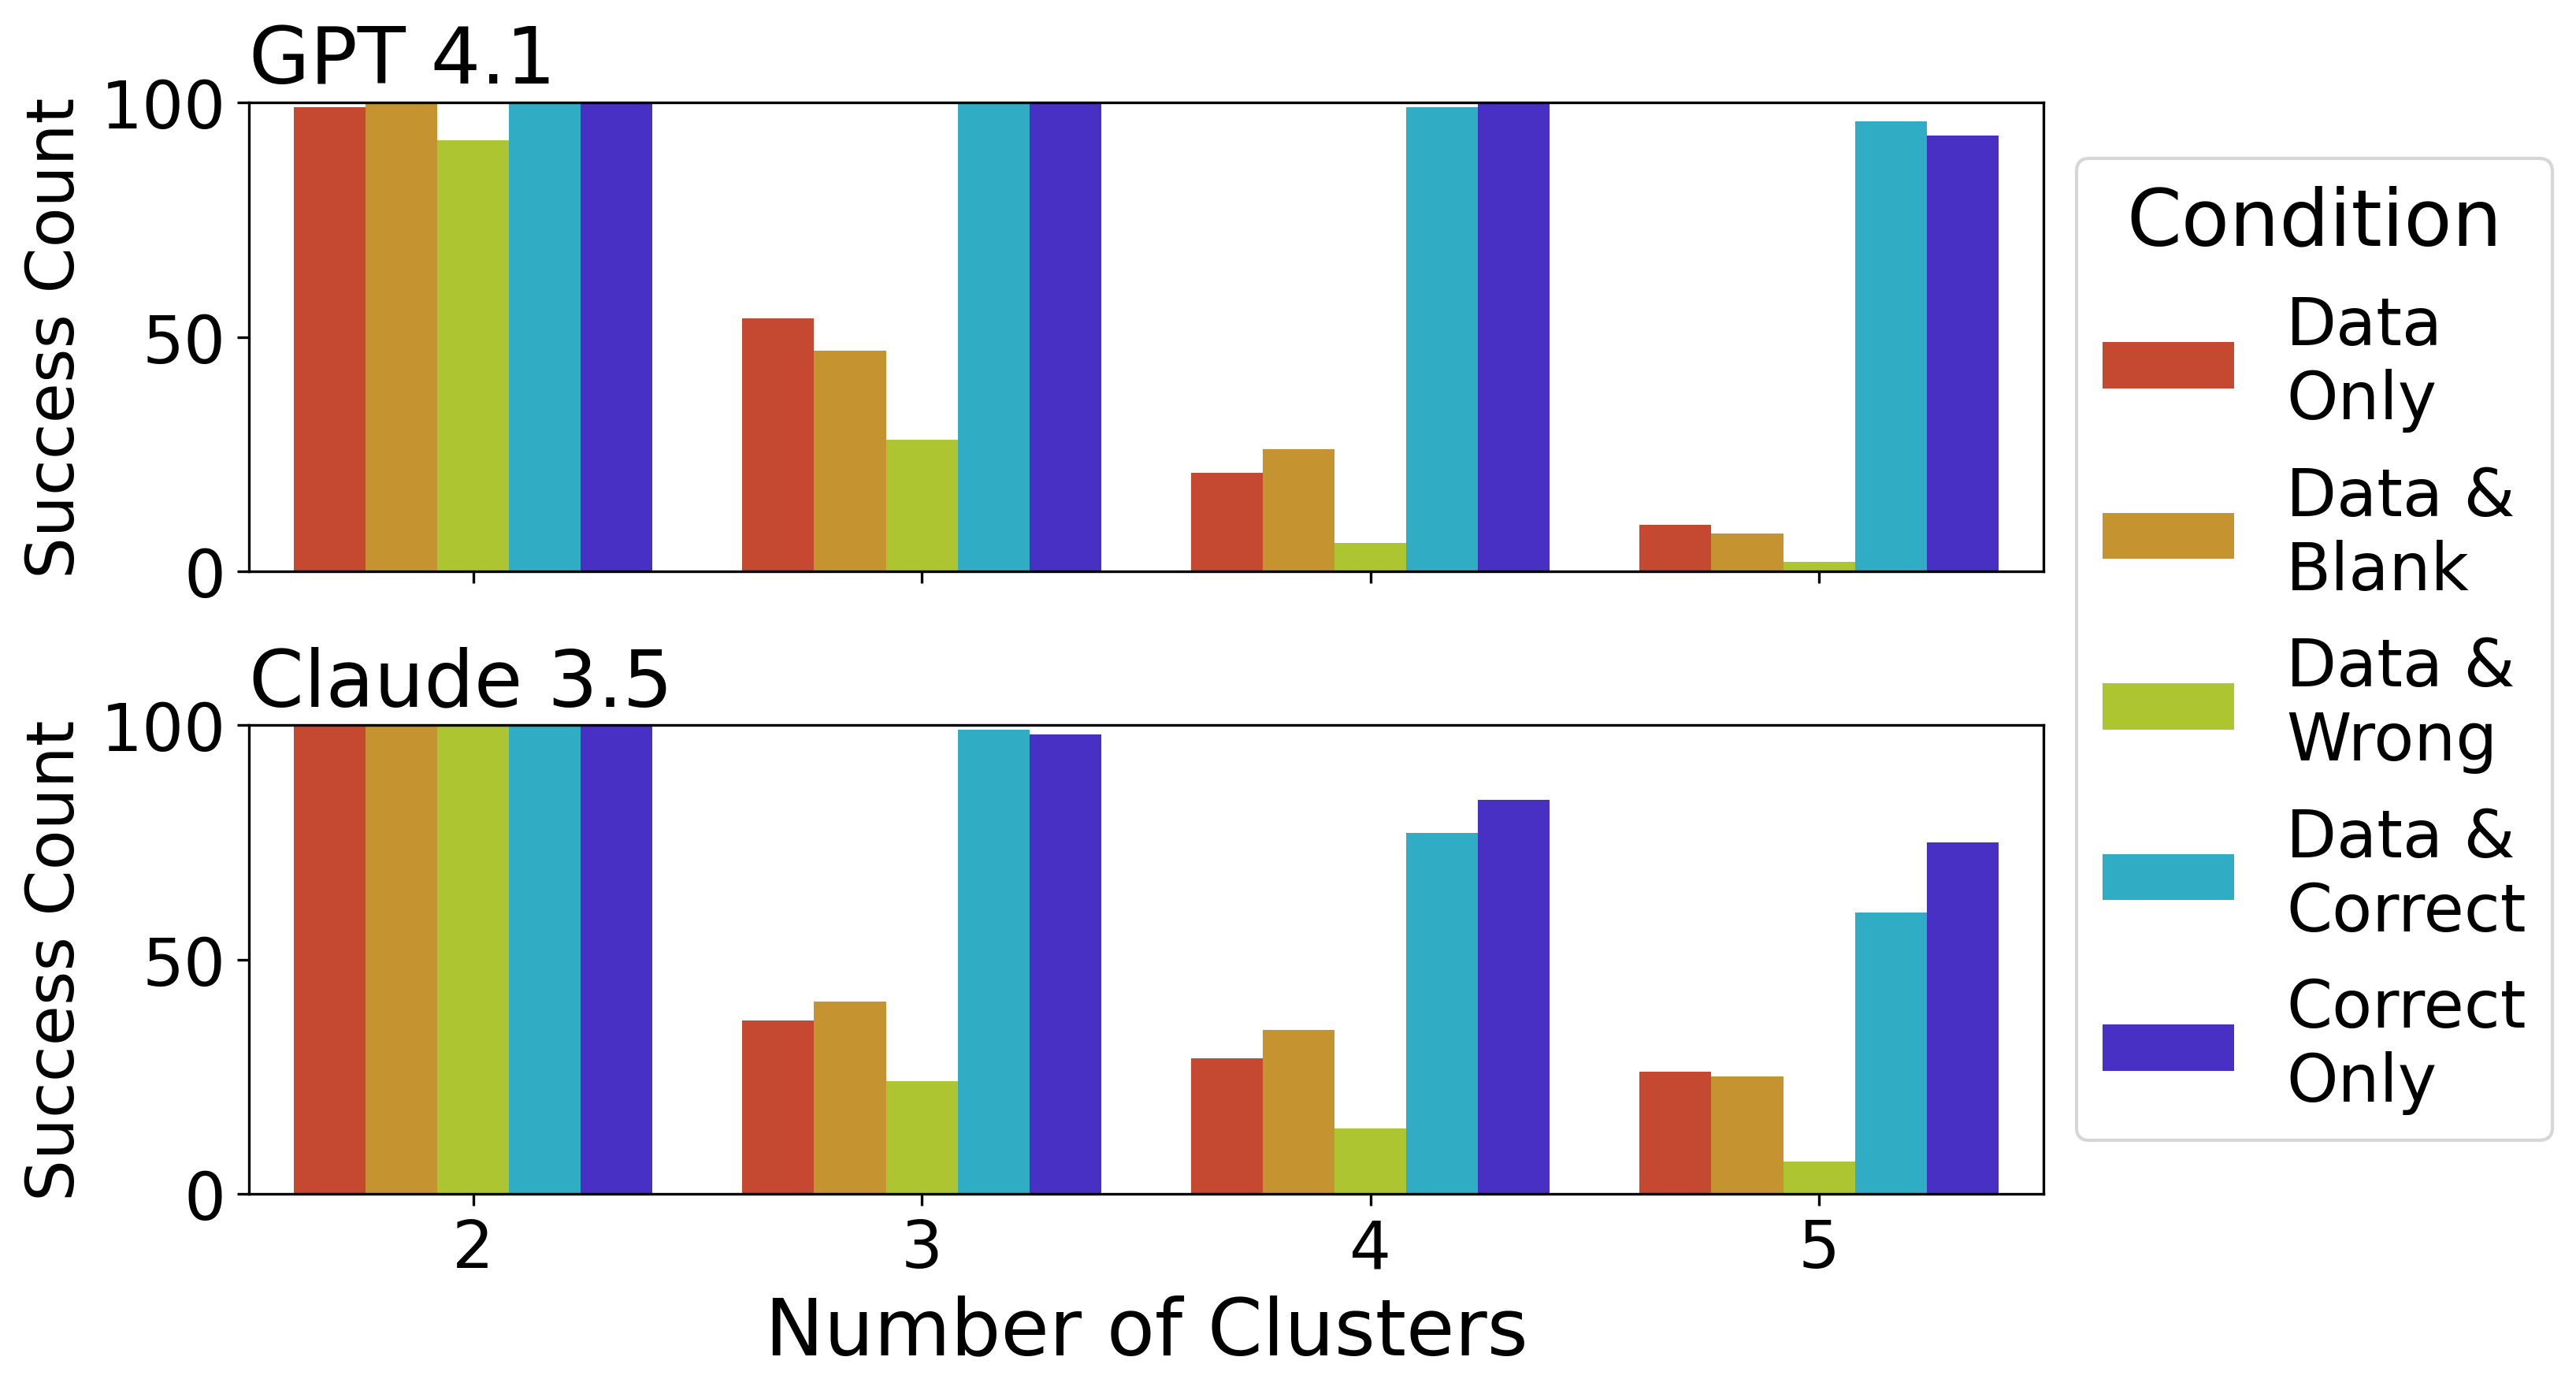

In [3]:
get_successes_barplot(get_clusters_df(), "num_clusters", "success")

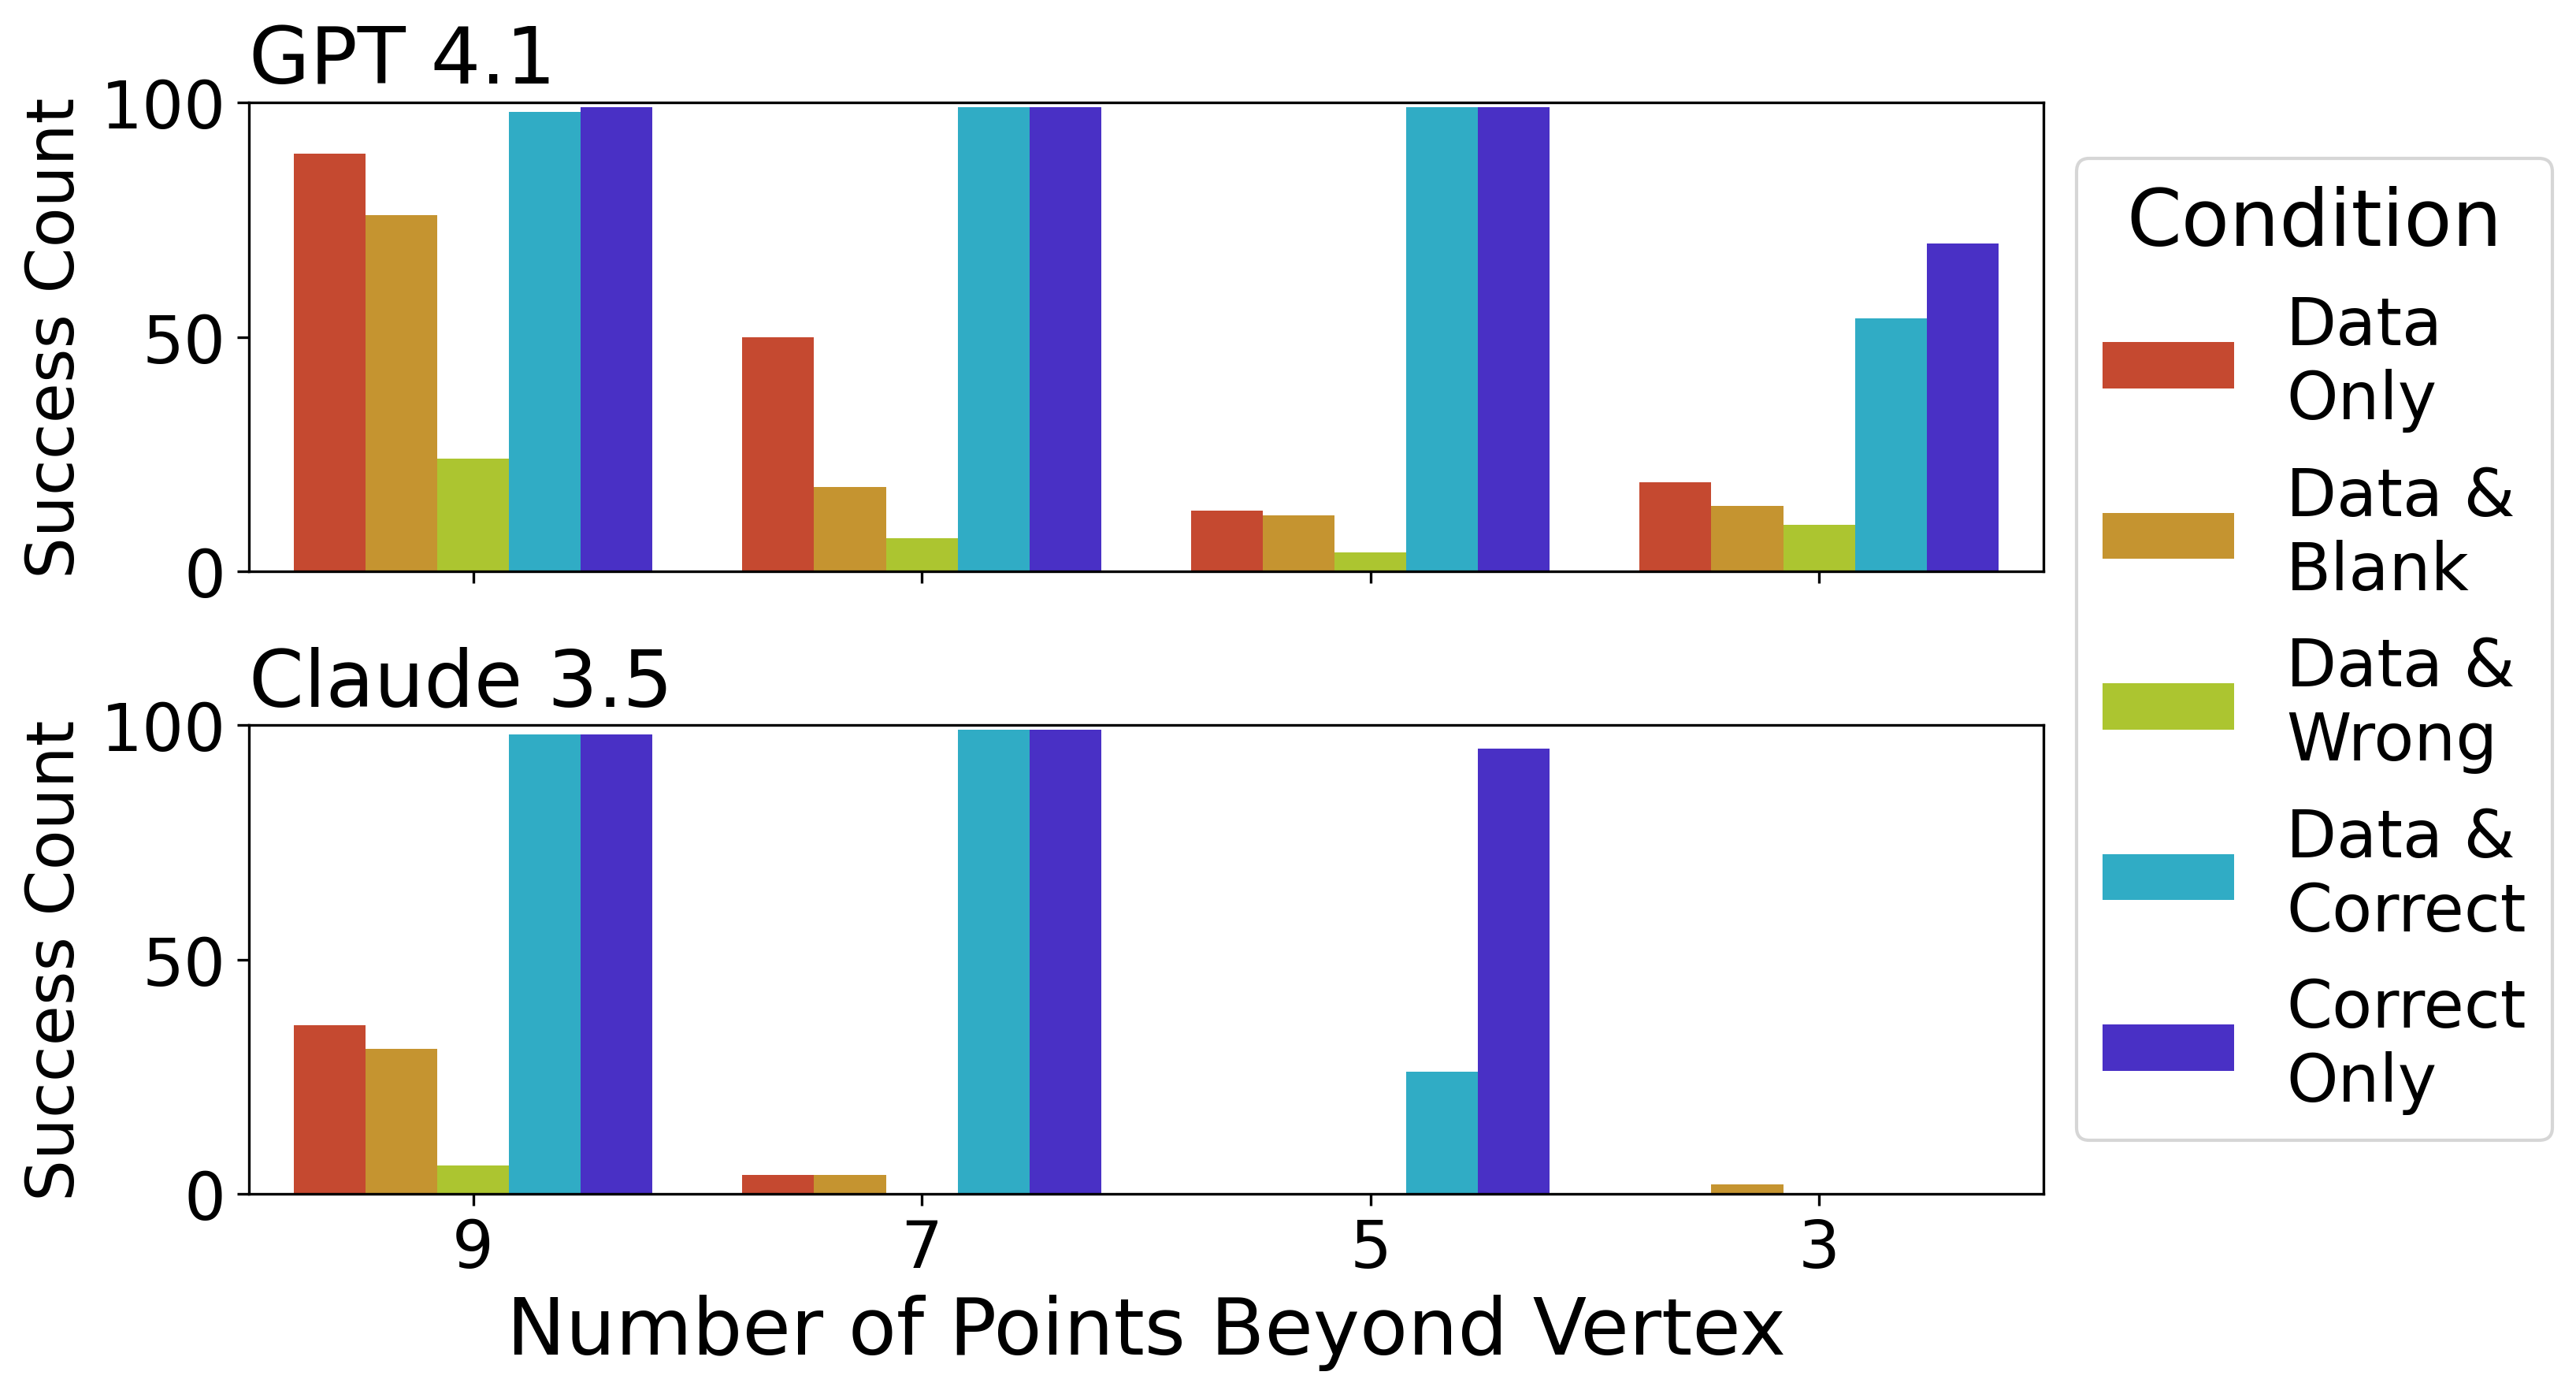

In [4]:
get_successes_barplot(get_nonlinearity_df(), "extra_points", "specific_detected")

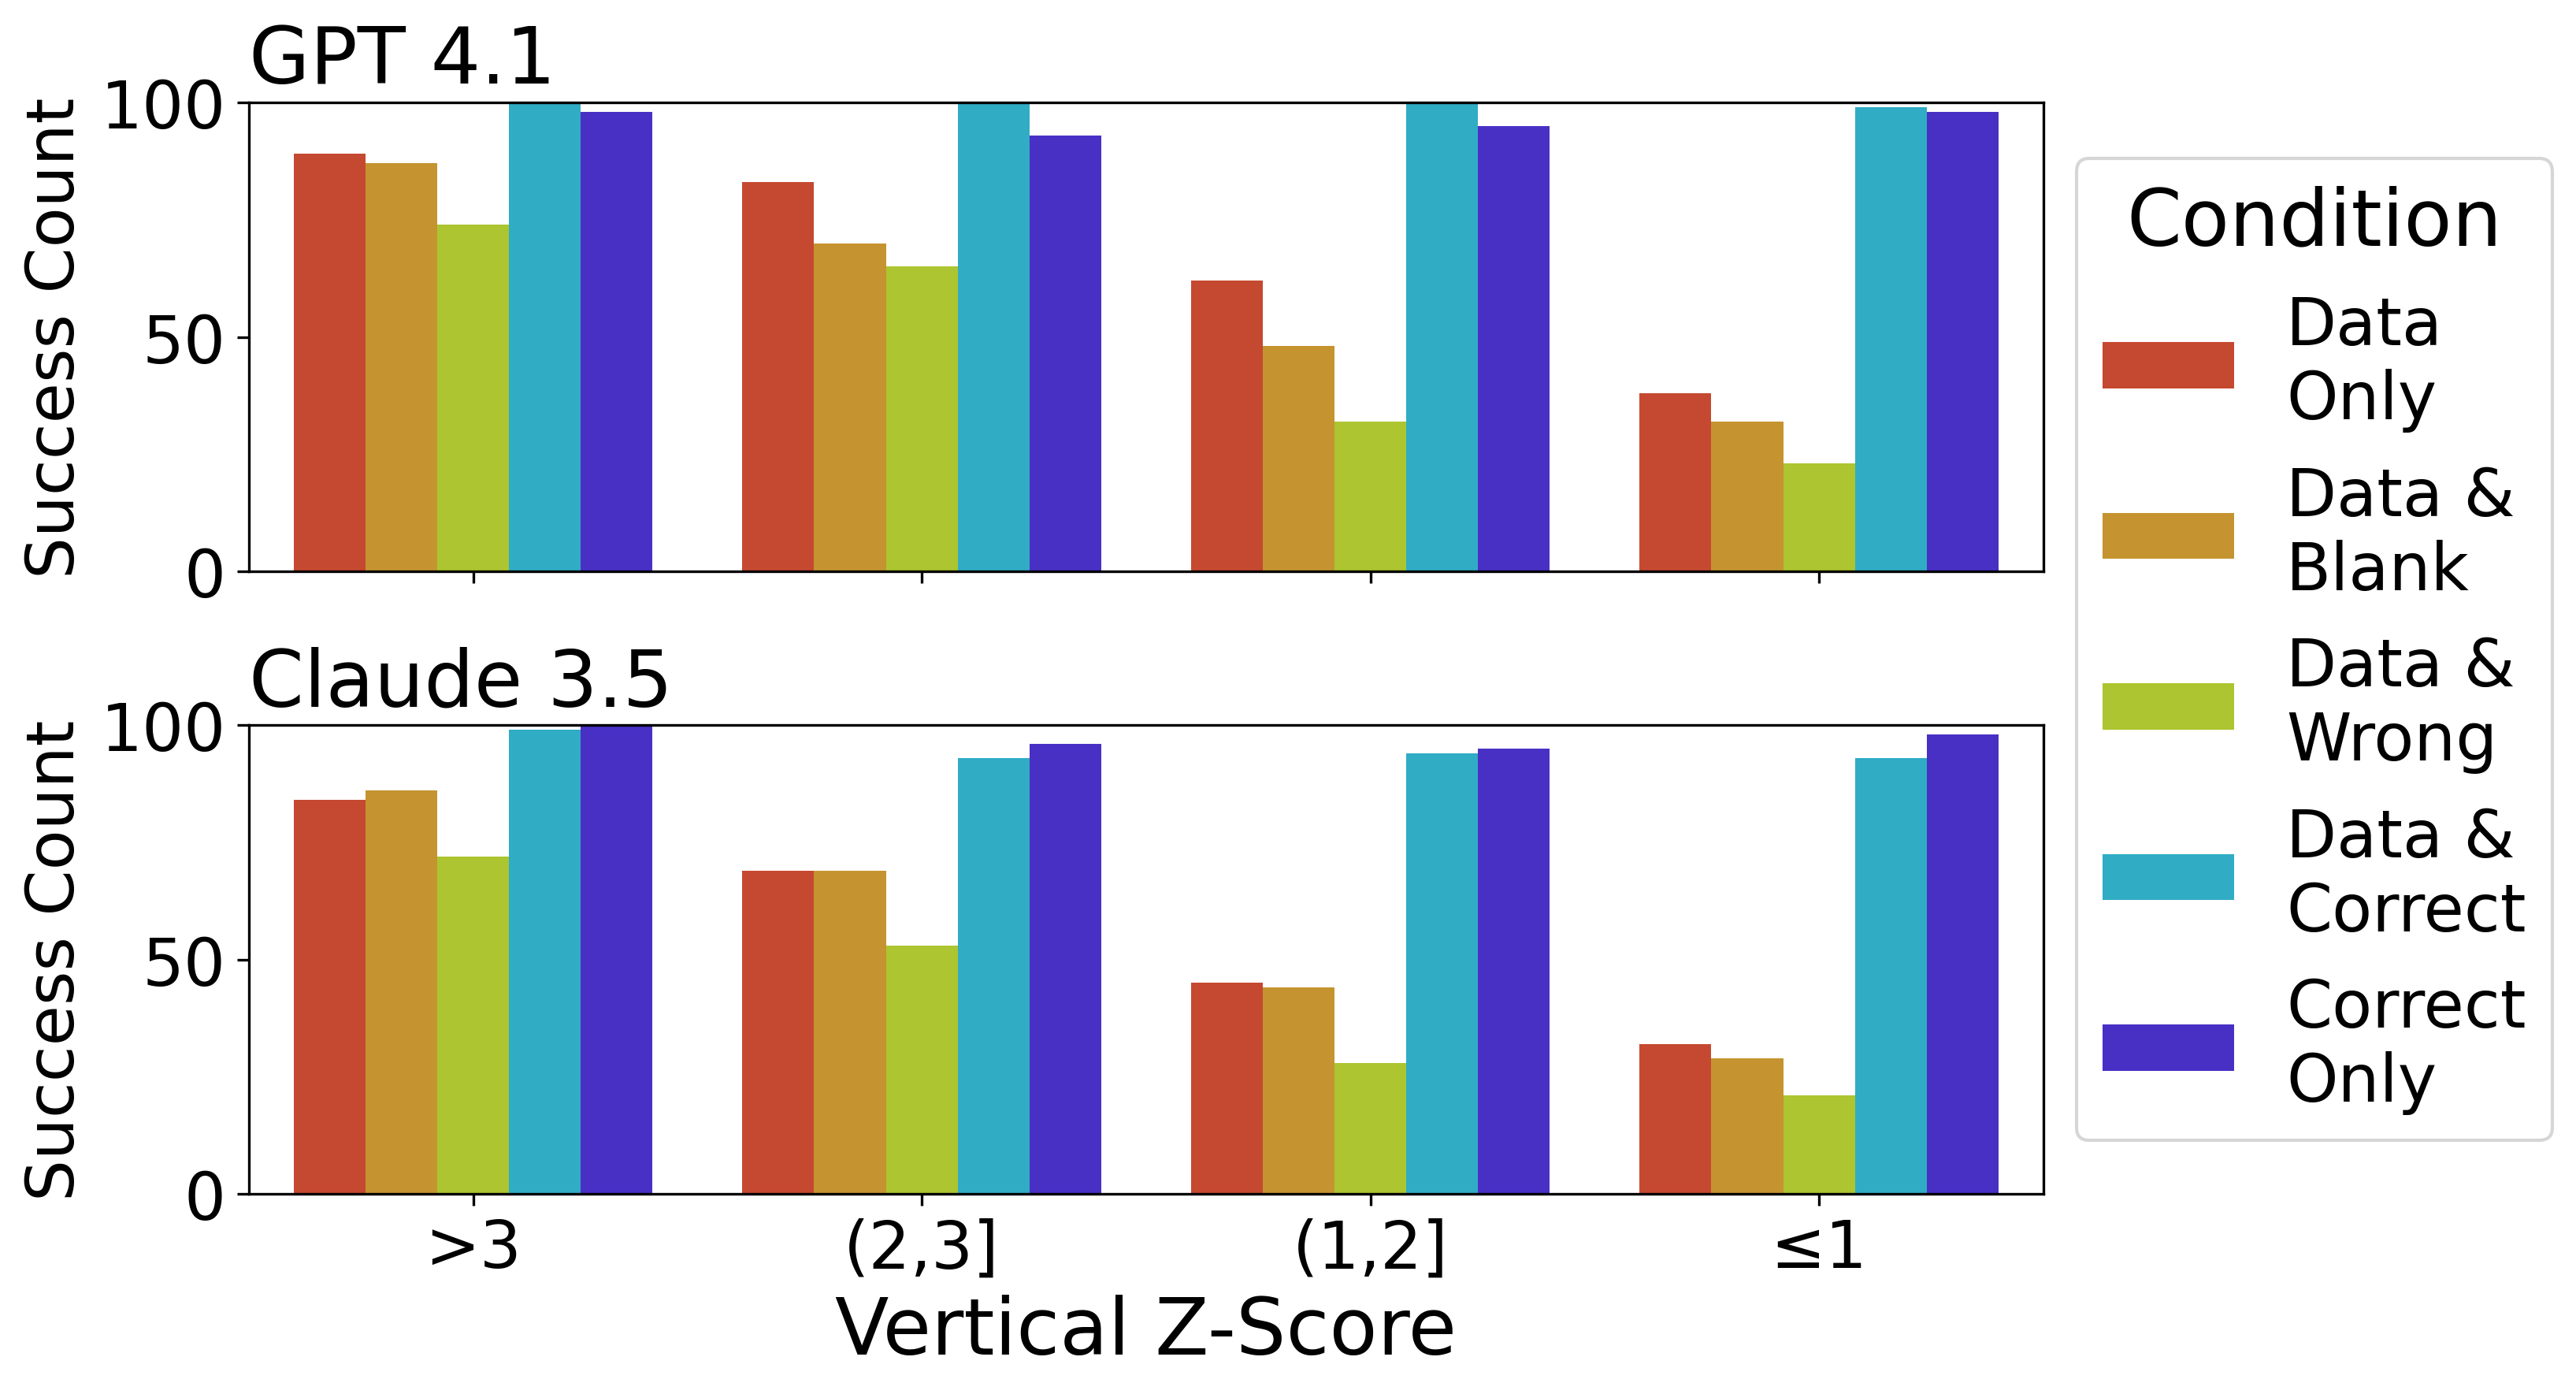

In [5]:
get_successes_barplot(get_outlier_df(), "z_score", "success")